**Hybrid Image**
* Hybrid image is generated by combining low pass filter of one image and high pass filter of another image.
* The points that are closer to the origin correspond informally to the broad, smooth changes in the image are called "low frequency" componennts. 
* The points that are further away correspond to sharp changes and edges, and are called "high frequency" components.
* The Gaussian filter function with variance sigma and center (a, b) is the function g(x,y) = e^{-\frac{(x - a)^2 + (y - b)^2}{2 \sigma^2}}.
* In particular, at zero the gaussian function is 1 and it gradually drops to zero as you get farther away. 
* The parameter sigma controls the rate at which it vanishes.
* In hybrid one can see one image from a near distance and another image from a far distance.
* Following is my approach to generate the hybrid image:
  * Read input grayscale and color images for generating grayscale and color hybrid images.
  * Resize both the input images to same size.
  * Know for the different values of sigma for low and high pass filter.
  * Apply the gaussian function for low and high pass this function returns a gaussian kernel of random integers in a matrix format.
  * apply convolution function to get low and high frequency components of the image. 
  * if image is colored then apply calculate convolution for each channel seperately and then combine the individual channels else its a grayscale image so pad and calculate convolution.
  * zero padding is also added to the image.
  * padding is added to preserve features that exist at the edges of the original matrix and its added to control the size of the output feature map.
  * Final step is to combine low and high pass frequency components to generate hybrid image.

* Program was tested for different sigma values for low and high pass and results of the code are displayed below.



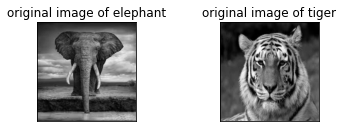


 hybrid image for different values of σ for low pass and high pass filters

 hybrid image with low:1 and high:2


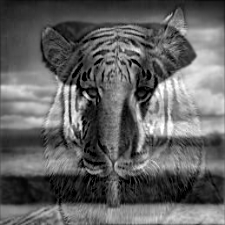


 hybrid image with low:2 and high:3


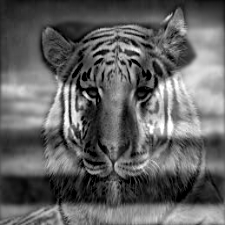


 hybrid image with low:3 and high:4


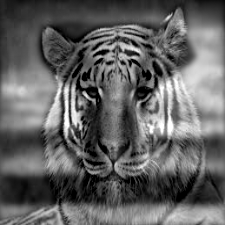


 hybrid image with low:4 and high:5


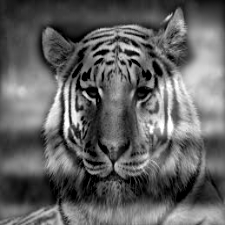


 hybrid image with low:5 and high:6


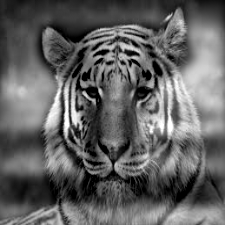



 original color image of lion


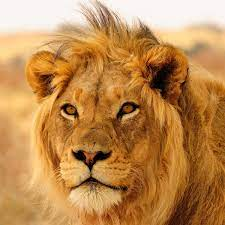


 original image of tiger


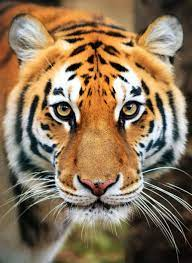


 hybrid image for different values of σ for low pass and high pass filters

 hybrid image with low:1 and high:2


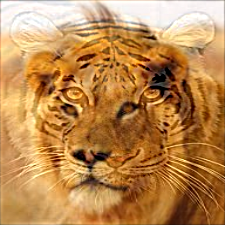


 hybrid image with low:2 and high:3


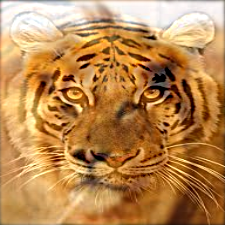


 hybrid image with low:3 and high:4


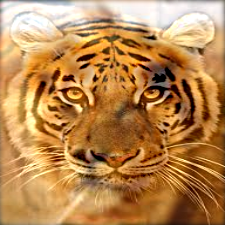


 hybrid image with low:4 and high:5


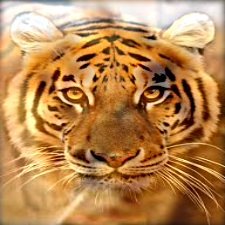


 hybrid image with low:5 and high:6


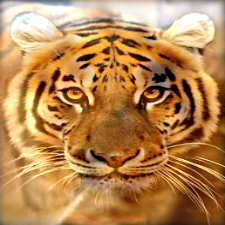

In [ ]:
# for diaplaying image in google colab
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt
import numpy as np
import cv2

# function to calculate convolution
def cal_conv(image, kernel):

    # rotating kernel with 180 degrees
    kernel = np.rot90(kernel, 2)

    # get number of rows
    kernel_r = int(np.array(kernel).shape[0]) # rows
    # get number of columns
    kernel_c = int(np.array(kernel).shape[1]) # columns

    # set kernel matrix to random int matrix and make sure that the scale of kernel is odd
    if ((kernel_r % 2 != 0) & (kernel_c % 2 != 0)):  
        # the scale of result
        conv_r = image.shape[0] - kernel.shape[0] + 1
        conv_c = image.shape[1] - kernel.shape[1] + 1
        conv = np.zeros((conv_r, conv_c))

        # convolve
        for i in range(int(conv_r)):
            for j in range(int(conv_c)):
                result = (image[i:i + kernel_r, j:j + kernel_c] * kernel).sum()
                conv[i][j] = result
    return conv
 
# this function takes and input image and checks if its rgb or grayscale
# if its rgb then seprates 3 channels and apply filter on each channel seperately else its a grayscale image
# padding is added to preserve features that exist at the edges of the original matrix
# padding is added to control the size of the output feature map
def conv(image,kernel):

    # get the number required for zero padding
    kernel_r = int((kernel.shape[0]-1)/2)
    kernel_c = int((kernel.shape[1]-1)/2)

    # if number of channels equal to three that is RGB then apply filter on each channel
    if len(image.shape) == 3:
        # pad the image
        image = np.pad(image, ((kernel_r, kernel_r), (kernel_c, kernel_c),(0, 0)), 'constant', constant_values=0)

        image_r = image[:, :, 0]
        image_g = image[:, :, 1]
        image_b = image[:, :, 2]
        result_r = cal_conv(image_r, kernel)
        result_g = cal_conv(image_g, kernel)
        result_b = cal_conv(image_b, kernel)
        # combine the output of individual filters and stack it
        result_picture = np.dstack([result_r, result_g, result_b])
    
    # if the picture is black and white or grayscale
    elif len(image.shape) == 2:
        # pad image
        image = np.pad(image, ((kernel_r, kernel_r), (kernel_c, kernel_c)), 'constant', constant_values=0)
        result_picture = cal_conv(image, kernel)

    # returns the convolved image (of the same shape as the input image)
    return result_picture


# fuction for calculating gaussian blur 
# this function takes sigma value if its even then makes it odd
# then it get the center position then calculates gaussian
def gaussian_kernel(sigma):

    # set the sacle
    # this means the window is plus or minus sigmas from the centre of the gaussian
    # so if sigma is 3 then window is +/-3 units from the center
    size = (int)(8 * sigma + 1) 
    if (size % 2 == 0):
        size += 1   # size must be odd

    # centre position
    center = (size - 1) / 2

    # state kernel equal to size 
    kernel = np.zeros((size, size))

    kernel_sum = 0
    # gaussian calculating
    for i in range(size):
        x2 = pow(i - center, 2)
        for j in range(size):
            y2 = pow(j - center, 2)
            g = np.exp(-(x2 + y2)/(2 * sigma * sigma)) / (2 * np.pi * sigma * sigma)
            kernel[i][j] = g
            kernel_sum += kernel[i][j]

    return kernel

def hybrid_image(low_img, low_sigma, high_img, high_sigma):

    # make kernel
    low_kernel = gaussian_kernel(low_sigma)
    high_kernel = gaussian_kernel(high_sigma)

    # convolve low pass pictures
    low_img = conv(low_img, low_kernel)

    # make high pass picture
    high_img = (high_img - conv(high_img, high_kernel))

    # hybrid image by combining low and high image
    hybrid =  high_img + low_img

    return hybrid

# this function runs for grayscale and colored images 
# generates hybrid image by calling hybrid_image function for both grayscale and color images
def main():
    # for grayscale images
    im0 = cv2.imread('/content/ele.jpeg',cv2.IMREAD_GRAYSCALE) 
    im1 = cv2.imread('/content/tig.jpeg', cv2.IMREAD_GRAYSCALE) 
    
    # resize images to same size
    im0=cv2.resize(im0,(225,225))
    im1=cv2.resize(im1,(225,225))
    
    # print original grayscale images
    plt.subplot(2,2,1),plt.imshow(im0,cmap='gray', vmin=0, vmax=255)
    plt.title('original image of elephant'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(im1,cmap='gray', vmin=0, vmax=255)
    plt.title('original image of tiger'), plt.xticks([]), plt.yticks([])
    plt.show()

    # for different values of sigma(σ) for low and high get the hybrid images
    print("\n hybrid image for different values of σ for low pass and high pass filters")
    for i in range(0,5):
        hybrid=hybrid_image(im0,i+1,im1,i+2)
        cv2.imwrite('hybrid_gray{}.jpeg'.format(i),hybrid)
        # below line prints the hybrid images for different values of low and high for sigma(σ)
        print("\n hybrid image with low:{} and high:{}".format(i+1,i+2))
        cv2_imshow(hybrid)
       
    # for color images
    im0 = cv2.imread('/content/li.jpeg') 
    im1 = cv2.imread('/content/tigc.jpeg') 

    # print original color images
    print('\n\n original color image of lion')
    cv2_imshow(im0)
    print('\n original image of tiger')
    cv2_imshow(im1)
    
    # resize images to same size
    im0=cv2.resize(im0,(225,225))
    im1=cv2.resize(im1,(225,225))
    
    # for different values of sigma(σ) for low and high get the hybrid images
    print("\n hybrid image for different values of σ for low pass and high pass filters")
    for i in range(0,5):
        hybrid=hybrid_image(im0,i+1,im1,i+2)
        cv2.imwrite('hybrid_color{}.jpeg'.format(i),hybrid)
        # below line prints the hybrid images for different values of low and high for sigma(σ)
        print("\n hybrid image with low:{} and high:{}".format(i+1,i+2))
        cv2_imshow(hybrid)
        
if __name__:main()


**Hybrid Image Output Observations:**
* It can be observed in the above images for grayscale and colored images the value of low=1 and high=2 for the images gives the best output hybrid image. 
* After few iterations it can be obeserved that only one image can been seen and its difficult to find the another image in the hybrid image. 
* I have printed for 5 iterations and after 2 iterations one can see only one image for colored and grayscale that is the image of tiger so a after few more iterations we will see the more refined image of tiger and another image will be completely gone.
* However, as sigma(σ) increases, the kernels waste computation because they are much
wider than necessary to faithfully capture the Gaussian to a reasonable amount
* So the very first image hybrid_gray0.jpeg and hybrid_color0.jpeg generated with low=1 and high=2 is the best hybrid image for colored and grayscale image.
* one see one image from near and another image at far distance in hybrid image.

**Best hybrid image grayscale**

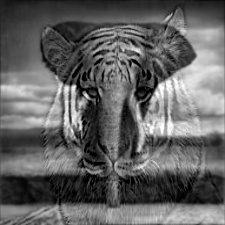

In [ ]:
# best hybrid grayscale image
best_gray = cv2.imread('/content/hybrid_gray0.jpeg') 
cv2_imshow(best_gray)

**Best hybrid image colored**

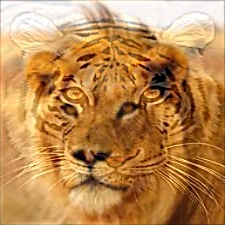

In [ ]:
# best hybrid grayscale image
best_color = cv2.imread('/content/hybrid_color0.jpeg') 
cv2_imshow(best_color)